# Create Model Dataset

## **Introduction:** 

This notebook extracts bank marketing data from the UCI Machine Learning Repository. The objective is to build a classification model to predict the subscriptions. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Business Problem:** How to build a classification model to predict the customers who are expected to subscribe a term deposit (variable y).

In [3]:
# Exercise 03: Carry out mapping to gaussian distribution of numeric variables from the given data

# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

# import libraries required for preprocessing
import sklearn as sk
from scipy import stats
from sklearn import preprocessing

# set the working directory # in the example, the folder 'packt_exercises' is in the desktop
os.chdir("/Users/svk/Desktop/packt_exercises")


## Data Source

Read the input data that is downloaded from the UCI Machine Library repository for Bank Marketing Data from the link: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [22]:
# read the downloaded input data (marketing data)
df = pd.read_csv('bank.csv', sep=';')

# identify the target variable in the data
DV = 'y'

# hot encoding y
df[DV]= df[DV].astype('category')
df[DV] = df[DV].cat.codes

# generate train and test
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

# create the Y and X data (DV and IVs)
y_train = train[DV] # selecting the target variable (dependent variable) as y
train = train.drop(columns=[DV]) # dropping the DV or y
train.head()

# create the Y and X data (DV and IVs)
y_test = test[DV] # selecting the target variable (dependent variable) as y
test = test.drop(columns=[DV]) # dropping the DV or y
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


### Data Dictionary

Provides detailed attribute level information:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Data Understanding

To understand the data at a attribute level, we can use functions like info and describe, however, pandas_profiling is a library that provides many descriptive information in one function where we can extract the following information:

At dataset level: 

1. Number of variables
2. Number of observations
3. Total Missing (%)
4. Total size in memory
5. Average record size in memory
6. Correlation Matrix
7. Sample Data

At attribute level:

1. Distinct count
2. Unique (%)
3. Missing (%)	
4. Missing (n)	
5. Infinite (%)
6. Infinite (n)
7. Histogram for distribution
8. Extreme Values

In [29]:
# lets segment the data to numeric and categorical and carry out distribution transformation on the numeric data

# for getting numerical data from the raw data
numeric_df = train._get_numeric_data()

# Data Preprocessing

## **Preprocessing Step 1: Data Transformation** 

In [30]:
# loop for identifying the columns with non-normal distribution 
numeric_df_array = np.array(numeric_df) # converting to numpy arrays for more efficient computation

loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used
        
        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

p = 6.57189e-54
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 2.63426e-215
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


## Create a Power Transformation Model

In [31]:
# create a PowerTransformer based transformation (box-cox) (note: box-cox can handle only positive values)
#pt = preprocessing.PowerTransformer(method='box-cox', standardize=False) # applicable if box-cox is used
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True) # applicable if yeo-johnson is used

### Apply Power Transformation Model on the Data

p = 1.05883e-20
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.06698e-155
The null hypothesis can be rejected: non-normal distribution
p = 0.00448565
The null hypothesis cannot be rejected: normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 2.37302e-191
The null hypothesis can be rejected: non-normal distribution
p = 1.70855e-191
The null hypothesis can be rejected: non-normal distribution


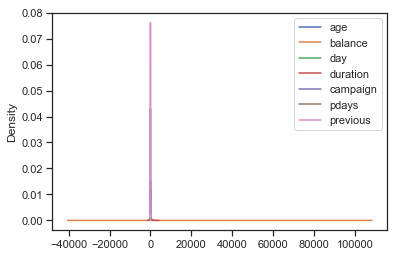

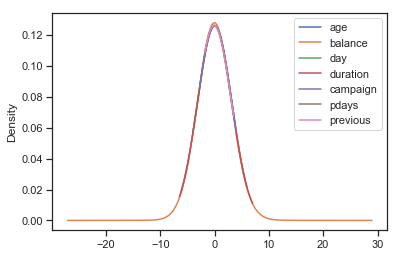

In [32]:
# select columns to  normalize
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)

# density plots of the features to check the normality
columns_to_normalize.plot.kde(bw_method=3)

# transforming to normal distribution
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)

# density plots of the features to check the normality
normalized_columns.plot.kde(bw_method=3)

# loop for identifying the columns with non-normal distribution on the transformed data
numeric_df_array = np.array(normalized_columns) # converting to numpy arrays for more efficient computation

loop_c = -1

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x) 
    alpha = 0.001
    print("p = {:g}".format(p))
        
    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        print("The null hypothesis can be rejected: non-normal distribution")
        
    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

### Bind the normalized and non-normalized Columns

In [33]:
# select columns to not normalize
columns_to_notnormalize = numeric_df
columns_to_notnormalize.drop(columns_to_notnormalize.columns[col_for_normalization], axis=1, inplace=True)

# binding both the non-normalized and normalized columns
numeric_df_normalized = pd.concat([columns_to_notnormalize.reset_index(drop=True), normalized_columns], axis=1)


# Develop Classification Model

In [34]:
# generate dependent and independent variables as X and y

X = numeric_df_normalized 
y = y_train

### Training the Algorithm

We have divided the data into training and testing sets. Now is the time to train our SVM on the training data. Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms.

In [35]:
# develop train and test data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. Execute the following code to train the algorithm

In [36]:
# import Support Vector Machine model from sklearn package

from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### Making Predictions
To make predictions, the predict method of the SVC class is used.

In [40]:
y_pred = svclassifier.predict(X_test) 

### Evaluating the Algorithm
Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.

In [41]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[641   0]
 [ 80   0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       641
           1       0.00      0.00      0.00        80

   micro avg       0.89      0.89      0.89       721
   macro avg       0.44      0.50      0.47       721
weighted avg       0.79      0.89      0.84       721



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
